In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7

## LSMA Test
Read some real AAPL minute data

In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=0B9-kA56h5JCMbXptY0kyVXZXaUU',
                 index_col=0, parse_dates=True)
data = np.round(data, 2)

In [3]:
data.CLOSE.as_matrix()[:40]

array([ 125.99,  125.91,  125.75,  125.62,  125.54,  125.45,  125.47,
        125.4 ,  125.43,  125.45,  125.42,  125.36,  125.23,  125.32,
        125.26,  125.31,  125.41,  125.5 ,  125.51,  125.41,  125.54,
        125.51,  125.61,  125.43,  125.42,  125.42,  125.46,  125.43,
        125.4 ,  125.35,  125.3 ,  125.28,  125.21,  125.37,  125.32,
        125.34,  125.37,  125.26,  125.28,  125.16])

Estimate the LSMA indicator

In [4]:
period = 20
obs = data.shape[0]

t = np.arange(period) + 1
t = sm.add_constant(t)
lsma = np.zeros(obs)

lsma[:period] = data.CLOSE[:period]

for i in range(period+1, obs+1): #obs period+3
    y = data.CLOSE[i-period:i]
    #print y
    #print i
    est = sm.OLS(y, t).fit()
    lsma[i-1] = est.predict([1, period])

Plot the results

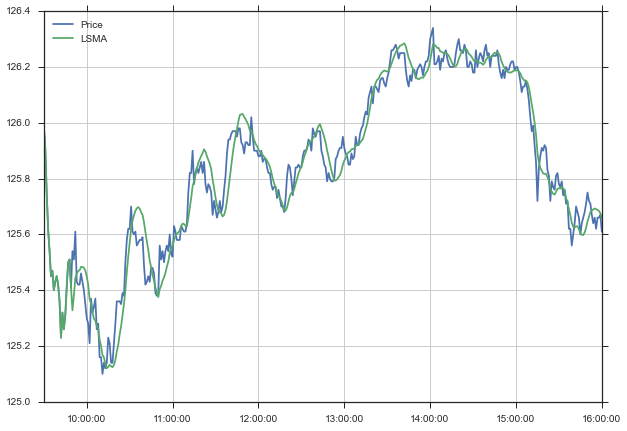

In [5]:
time = data.index

plt.plot(time, data.CLOSE, label='Price')
plt.plot(time, lsma, label='LSMA')
plt.legend(loc='upper left')
plt.grid()

Here are the results used in the LSMA Unit test.

In [6]:
results = np.round(lsma[:40], 4)
for c, obs in enumerate(results):
    print "{0:4}m,".format(obs),
    if (c+1) % 10 == 0: print "\n",

125.99m, 125.91m, 125.75m, 125.62m, 125.54m, 125.45m, 125.47m, 125.4m, 125.43m, 125.45m, 
125.42m, 125.36m, 125.23m, 125.32m, 125.26m, 125.31m, 125.41m, 125.5m, 125.51m, 125.41m, 
125.328m, 125.381m, 125.4423m, 125.4591m, 125.4689m, 125.4713m, 125.4836m, 125.4834m, 125.4803m, 125.4703m, 
125.4494m, 125.4206m, 125.3669m, 125.3521m, 125.3214m, 125.2986m, 125.2909m, 125.2723m, 125.2619m, 125.2224m, 
